Dataset shape: (1000, 21)

First 5 rows:


,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment,housing,existing_credits,job,people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1



Missing values:
checking_account     0
duration             0
credit_history       0
purpose              0
credit_amount        0
savings_account      0
employment           0
installment_rate     0
personal_status      0
other_debtors        0
present_residence    0
property             0
age                  0
other_installment    0
housing              0
existing_credits     0
job                  0
people_liable        0
telephone            0
foreign_worker       0
target               0
dtype: int64


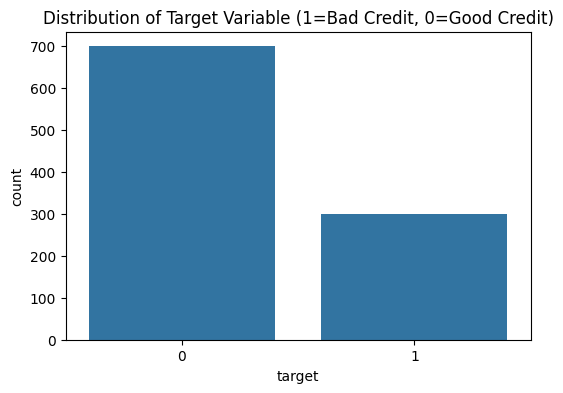


Target distribution:
target
0    0.7
1    0.3
Name: proportion, dtype: float64


<Figure size 1200x800 with 0 Axes>

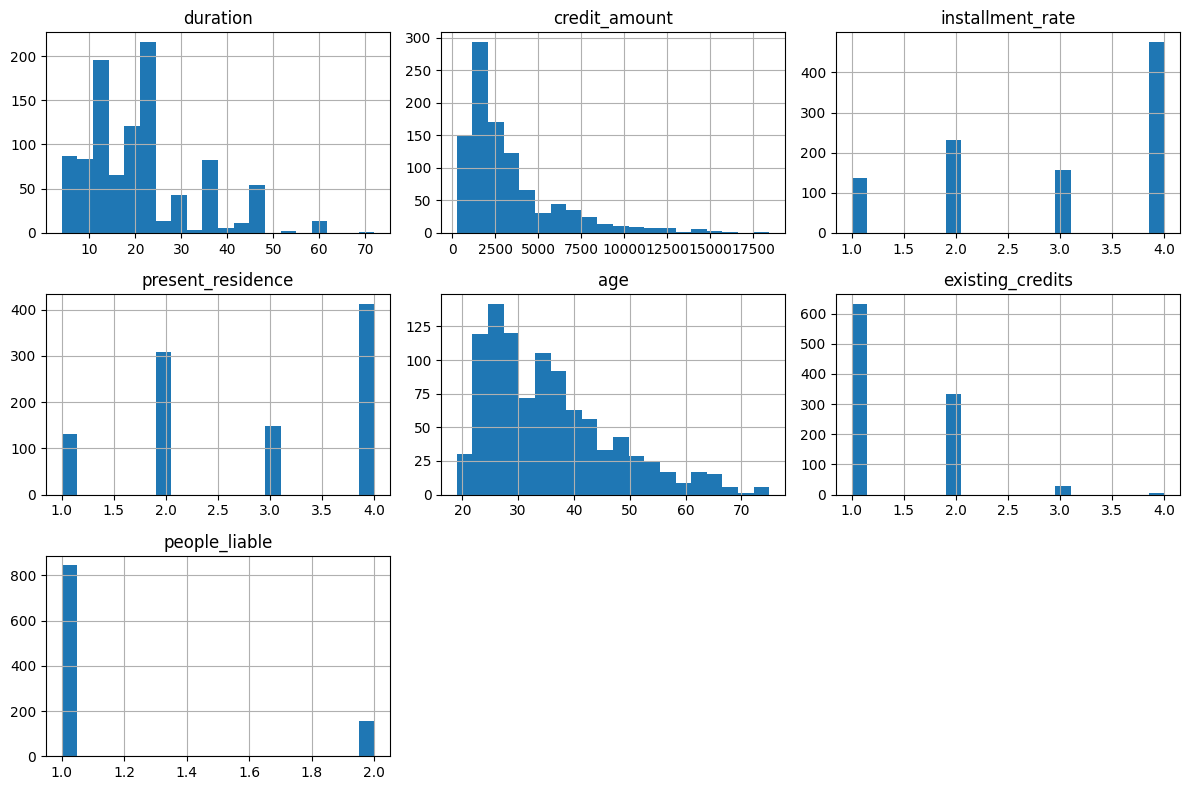

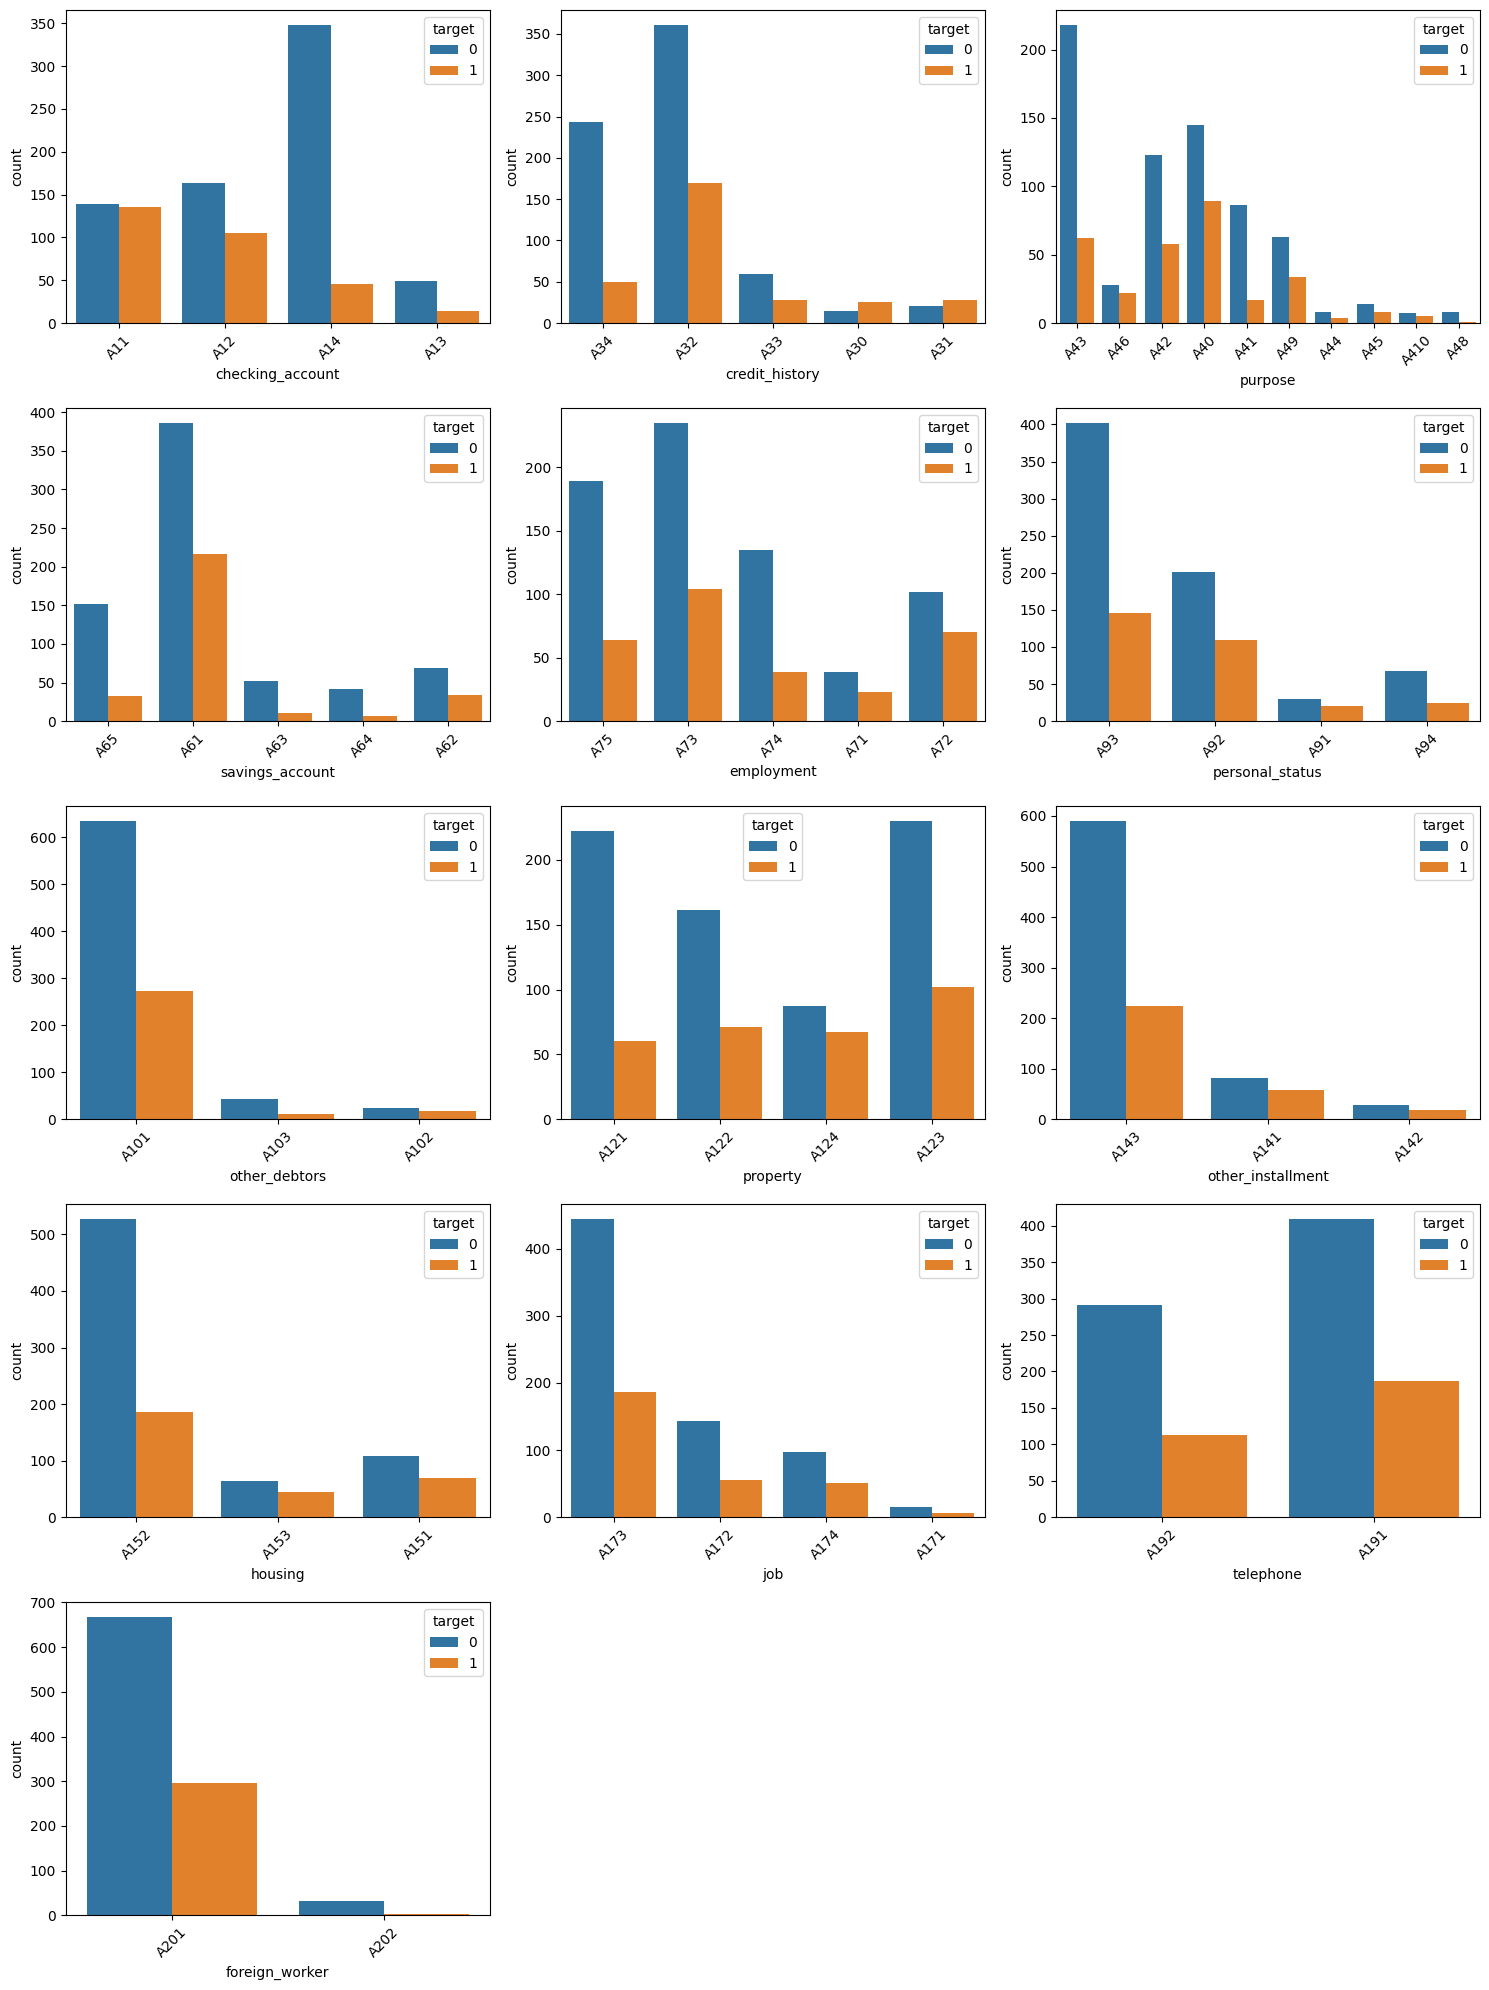

Logistic Regression Results:


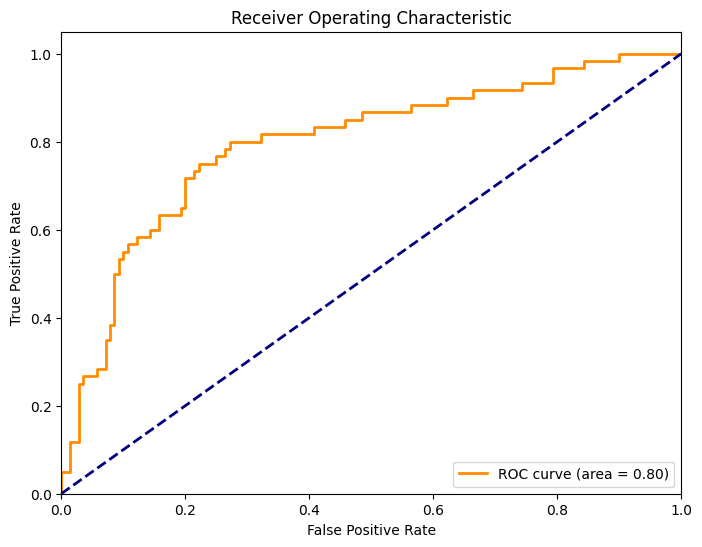

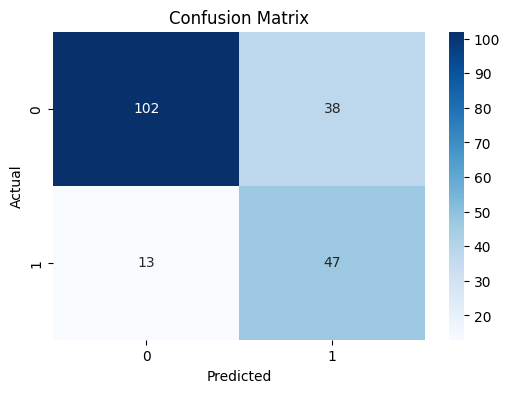

Accuracy: 0.7450
Precision: 0.5529
Recall: 0.7833
F1-Score: 0.6483
ROC-AUC: 0.7967

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       140
           1       0.55      0.78      0.65        60

    accuracy                           0.74       200
   macro avg       0.72      0.76      0.72       200
weighted avg       0.79      0.74      0.75       200


Best Decision Tree Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Decision Tree Results:


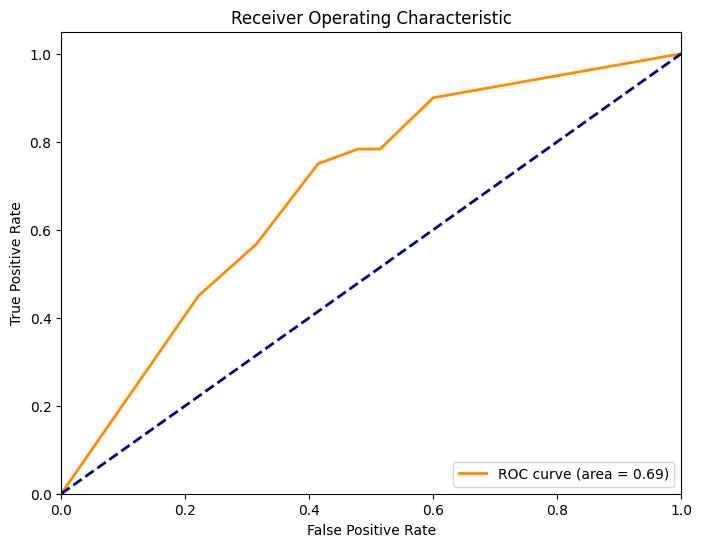

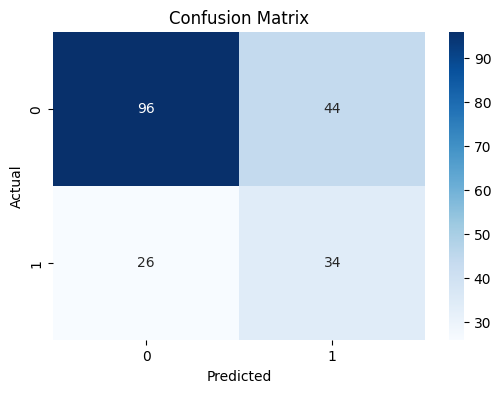

Accuracy: 0.6500
Precision: 0.4359
Recall: 0.5667
F1-Score: 0.4928
ROC-AUC: 0.6923

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       140
           1       0.44      0.57      0.49        60

    accuracy                           0.65       200
   macro avg       0.61      0.63      0.61       200
weighted avg       0.68      0.65      0.66       200


Best Random Forest Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Random Forest Results:


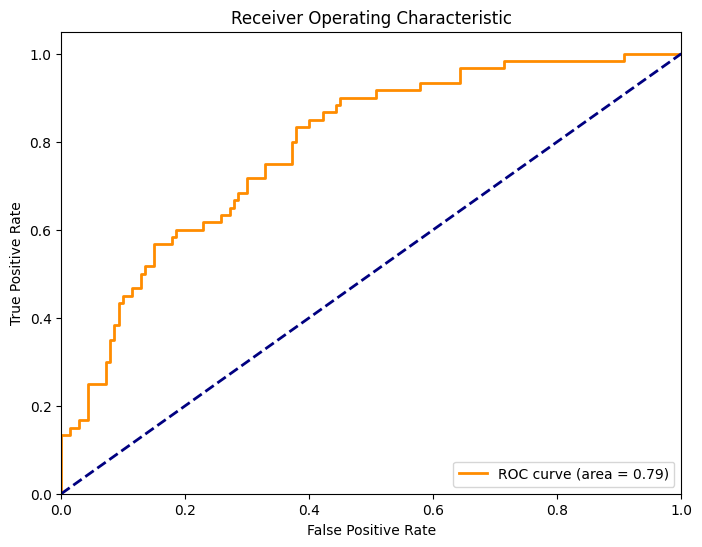

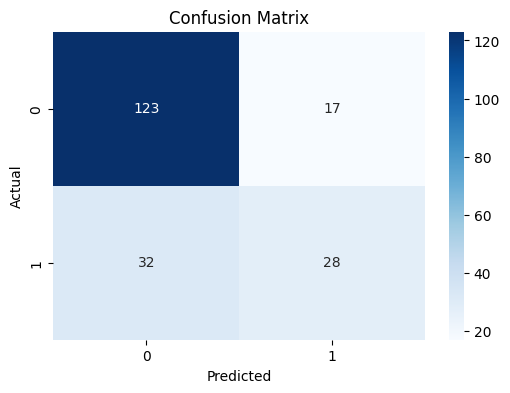

Accuracy: 0.7550
Precision: 0.6222
Recall: 0.4667
F1-Score: 0.5333
ROC-AUC: 0.7877

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       140
           1       0.62      0.47      0.53        60

    accuracy                           0.76       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200


Model Comparison:


,Logistic Regression,Decision Tree,Random Forest
accuracy,0.745000,0.650000,0.755000
precision,0.552941,0.435897,0.622222
recall,0.783333,0.566667,0.466667
f1,0.648276,0.492754,0.533333
roc_auc,0.796667,0.692262,0.787738


<Figure size 1200x600 with 0 Axes>

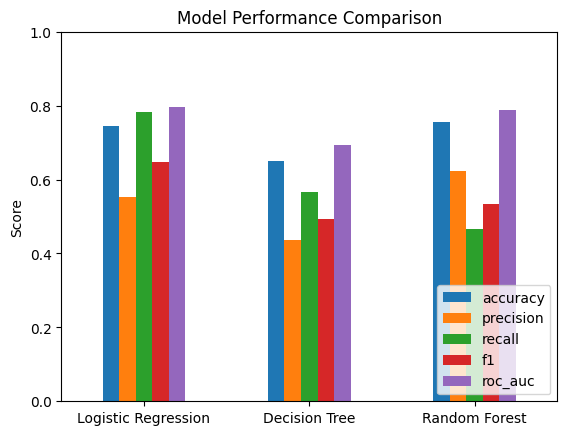

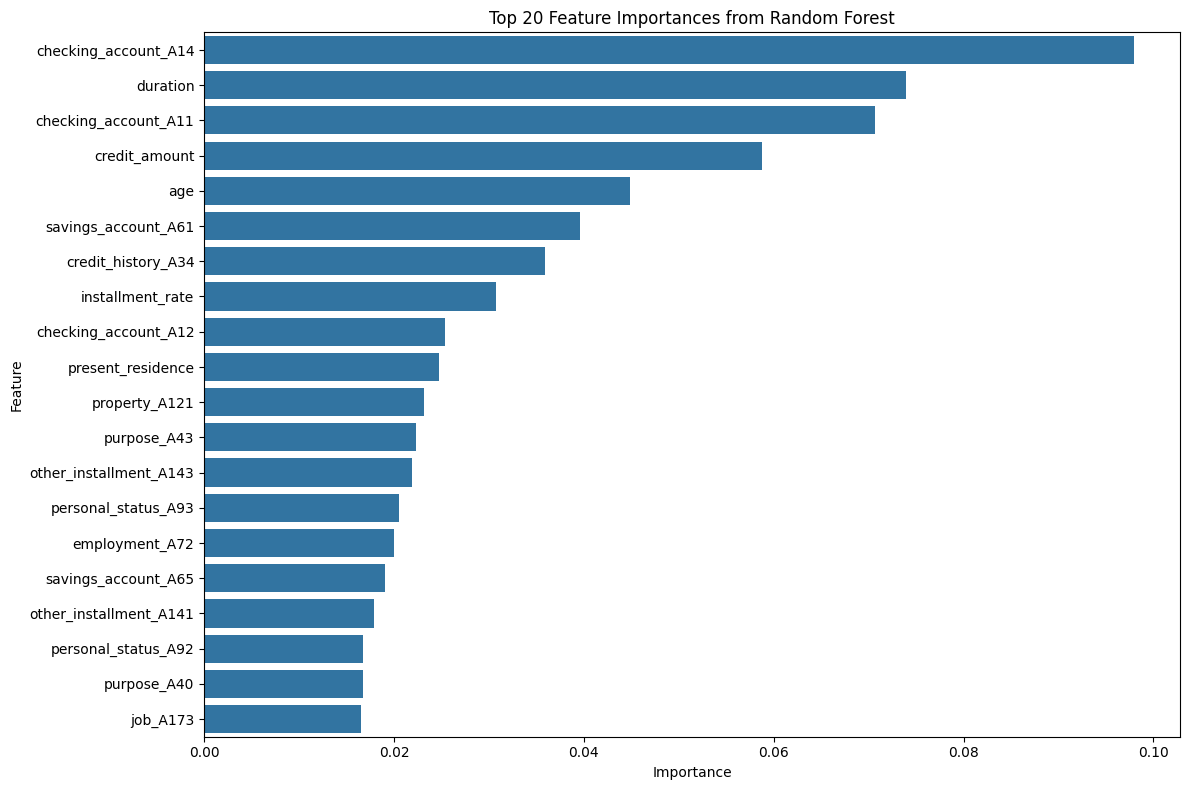

Best model (Random Forest) saved as 'credit_scoring_model.pkl'

Final Model Metrics:
Accuracy: 0.7550
Precision: 0.6222
Recall: 0.4667
F1-Score: 0.5333
ROC-AUC: 0.7877


In [1]:
# %% [markdown]
# # Credit Scoring Model
#
# **Objective**: Predict an individual's creditworthiness using past financial data.
#
# **Approach**: Use classification algorithms like Logistic Regression, Decision Trees, or Random Forest.

# %% [markdown]
# ## 1. Import Libraries and Load Data

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report, roc_curve, auc)
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn import set_config
set_config(display='diagram')

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    'checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
    'savings_account', 'employment', 'installment_rate', 'personal_status',
    'other_debtors', 'present_residence', 'property', 'age', 'other_installment',
    'housing', 'existing_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'target'
]

df = pd.read_csv(url, delimiter=' ', header=None, names=column_names)

# Convert target to binary (1 = bad credit, 0 = good credit)
df['target'] = df['target'].map({1: 0, 2: 1})

# %% [markdown]
# ## 2. Exploratory Data Analysis (EDA)

# %%
# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

# %%
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# %%
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (1=Bad Credit, 0=Good Credit)')
plt.show()

print("\nTarget distribution:")
print(df['target'].value_counts(normalize=True))

# %%
# Numerical features analysis
numerical_cols = ['duration', 'credit_amount', 'installment_rate',
                 'present_residence', 'age', 'existing_credits', 'people_liable']

plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=20, layout=(3, 3), figsize=(12, 8))
plt.tight_layout()
plt.show()

# %%
# Categorical features analysis
categorical_cols = ['checking_account', 'credit_history', 'purpose',
                   'savings_account', 'employment', 'personal_status',
                   'other_debtors', 'property', 'other_installment',
                   'housing', 'job', 'telephone', 'foreign_worker']

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=col, hue='target', data=df)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 3. Data Preprocessing and Train-Test Split

# %%
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps
numerical_cols = ['duration', 'credit_amount', 'installment_rate',
                 'present_residence', 'age', 'existing_credits', 'people_liable']

categorical_cols = ['checking_account', 'credit_history', 'purpose',
                   'savings_account', 'employment', 'personal_status',
                   'other_debtors', 'property', 'other_installment',
                   'housing', 'job', 'telephone', 'foreign_worker']

# Preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# %% [markdown]
# ## 4. Model Building with SMOTE in Pipeline

# %%
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification report
    cr = classification_report(y_test, y_pred)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(cr)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

# %% [markdown]
# ### 4.1 Logistic Regression with SMOTE

# %%
# Create pipeline with SMOTE for Logistic Regression
lr_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Train model
lr_pipe.fit(X_train, y_train)

# Evaluate
print("Logistic Regression Results:")
lr_metrics = evaluate_model(lr_pipe, X_test, y_test)

# %% [markdown]
# ### 4.2 Decision Tree with SMOTE and GridSearch

# %%
# Create pipeline with SMOTE for Decision Tree
dt_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(dt_pipe, param_grid, cv=5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)

# Best model
best_dt = dt_grid.best_estimator_
print("\nBest Decision Tree Parameters:", dt_grid.best_params_)

# Evaluate
print("\nDecision Tree Results:")
dt_metrics = evaluate_model(best_dt, X_test, y_test)

# %% [markdown]
# ### 4.3 Random Forest with SMOTE and GridSearch

# %%
# Create pipeline with SMOTE for Random Forest
rf_pipe = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
print("\nBest Random Forest Parameters:", rf_grid.best_params_)

# Evaluate
print("\nRandom Forest Results:")
rf_metrics = evaluate_model(best_rf, X_test, y_test)

# %% [markdown]
# ## 5. Model Comparison

# %%
# Create comparison dataframe
metrics_df = pd.DataFrame({
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics
})

# Display metrics comparison
print("\nModel Comparison:")
display(metrics_df)

# Plot metrics comparison
plt.figure(figsize=(12, 6))
metrics_df.T.plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

# %% [markdown]
# ## 6. Feature Importance (Random Forest)

# %%
# Get feature names from preprocessing
preprocessor.fit(X_train)
numeric_feature_names = numerical_cols
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

# Get feature importances from the best Random Forest model
importances = best_rf.named_steps['classifier'].feature_importances_

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 7. Conclusion and Model Saving

# %%
# Save the best model (Random Forest)
import joblib

# Create a dictionary with model and metadata
model_package = {
    'model': best_rf,
    'preprocessor': preprocessor,
    'feature_names': all_feature_names,
    'metrics': rf_metrics
}

joblib.dump(model_package, 'credit_scoring_model.pkl')
print("Best model (Random Forest) saved as 'credit_scoring_model.pkl'")

# Display final metrics
print("\nFinal Model Metrics:")
print(f"Accuracy: {rf_metrics['accuracy']:.4f}")
print(f"Precision: {rf_metrics['precision']:.4f}")
print(f"Recall: {rf_metrics['recall']:.4f}")
print(f"F1-Score: {rf_metrics['f1']:.4f}")
print(f"ROC-AUC: {rf_metrics['roc_auc']:.4f}")